In [1]:
!pip install labelme albumentations opencv-python

  Using cached opencv_python_headless-4.10.0.82-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.8 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/38.8 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.8 MB 855.7 kB/s eta 0:00:46
   ---------------------------------------- 0.5/38.8 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:34
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.28 requires opencv-python-headless==4.8.0.74, but you have opencv-python-headless 4.10.0.82 which is incompatible.


In [2]:
import os
import time
import uuid # Uniform unique identifier to get profesionnal and unique img names
import cv2

IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [4]:
cap = cv2.VideoCapture(0)
for num in range(number_images):
    print(f'Collecting image number {num}')
    ret, frame = cap.read()     # ret=read(binary) and frame=actual image
    img_name = os.path.join(IMAGES_PATH, f'{uuid.uuid1()}.jpg')     # generating name and path
    cv2.imwrite(img_name, frame)
    cv2.imshow('frame', frame)
    time.sleep(1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # close using 'q' or the cross
        break

cap.release()
cv2.destroyAllWindows()

In [62]:
!labelme

2024-06-12 23:47:57,962 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\adm1in\.labelmerc


In [6]:
import tensorflow as tf
import json     # labels are in json
import matplotlib.pyplot as plt
import numpy as np

In [39]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')       # all images paths
images.as_numpy_iterator().next()       # to check that it did pick up the images paths

b'data\\images\\c54171a1-28cc-11ef-bdc2-b8aeedbbdec1.jpg'

In [40]:
def load_image(img_path):
    byte_img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [41]:
images = images.map(load_image)     # to apply the function (load_image) on each path of our dataset
images.as_numpy_iterator().next()       # to check that images are np arrays

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [42]:
type(images)        # check type (should be tensorflow data pipeline)

tensorflow.python.data.ops.map_op._MapDataset

In [43]:
image_generator = images.batch(4).as_numpy_iterator()       # to then visualize 4 images at a time using matplotlib

In [75]:
plot_images = image_generator.next()    # to get new images each time we rerun this cell

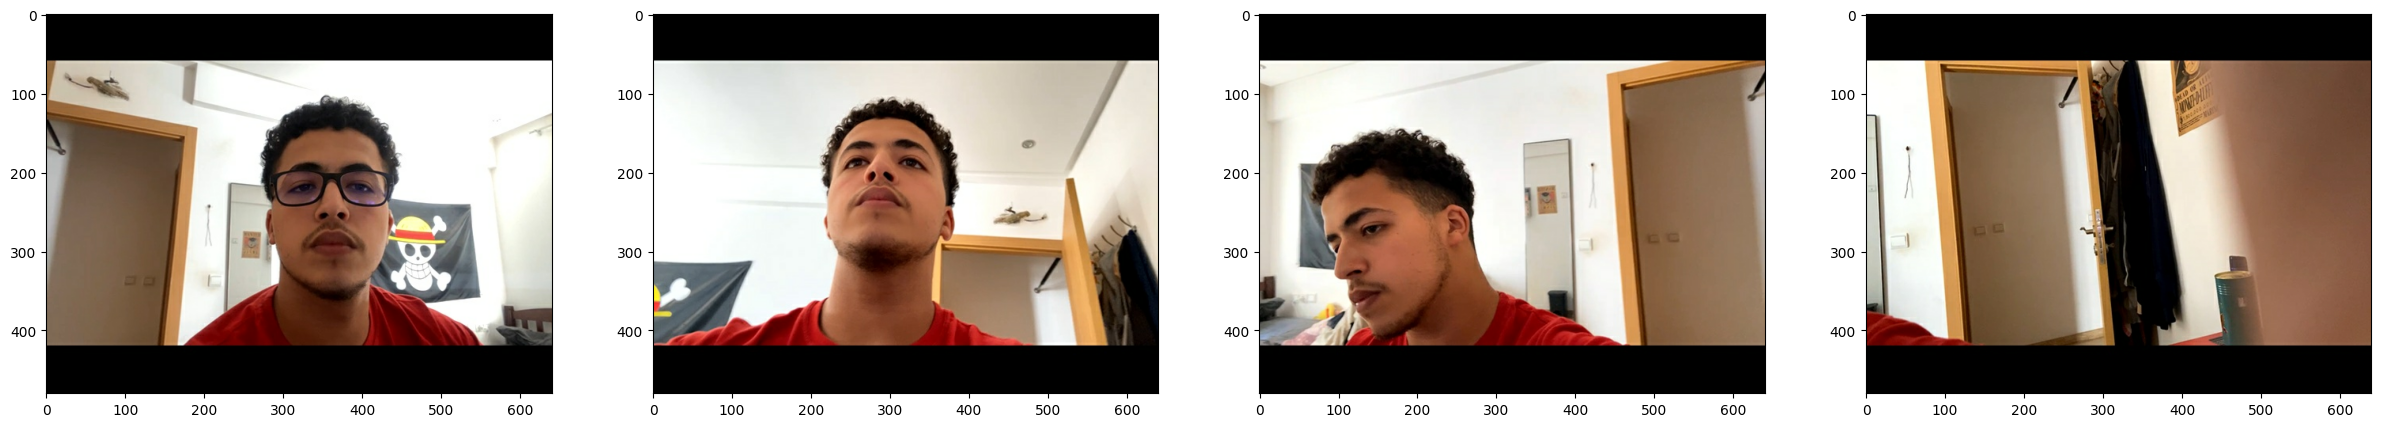

In [76]:
# visualizing our training data
fig, ax = plt.subplots(ncols=4, figsize=(30,30))
for index, image in enumerate(plot_images):
    ax[index].imshow(image)
plt.show()

In [80]:
all_images = sorted(os.listdir('data/images'))
all_labels = sorted(os.listdir('data/labels'))

In [81]:
len(all_images)

59

In [84]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

create_dir('data/train/images')
create_dir('data/train/labels')
create_dir('data/val/images')
create_dir('data/val/labels')
create_dir('data/test/images')
create_dir('data/test/labels')

In [86]:
import shutil
import random

def move_percent_files(source, destination, percentage):
    files = os.listdir(source)
    
    num_files_to_move = int(len(files) * (percentage / 100))    # from percentage to number

    files_to_move = random.sample(files, num_files_to_move)

    for file_name in files_to_move:
        shutil.move(os.path.join(source, file_name), os.path.join(destination, file_name))

    print(f"Moved {num_files_to_move} files from {source} to {destination}")

In [87]:
source = 'data/images'
destination = 'data/train/images'
percentage = 80

move_percent_files(source, destination, percentage)

Moved 47 files from data/images to data/test/images


In [88]:
destination = 'data/val/images'
percentage = 50

move_percent_files(source, destination, percentage)

Moved 9 files from data/images to data/val/images


In [89]:
destination = 'data/test/images'
percentage = 100

move_percent_files(source, destination, percentage)

Moved 3 files from data/images to data/test/images


In [93]:
for folder in ['train', 'val', 'test']:
    imgs_dir = os.path.join('data', folder, 'images')
    labels_dir = os.path.join('data', folder, 'labels')
    for file in os.listdir(imgs_dir):
        labelname = file.split('.')[0] + '.json'    # FORGOT THE DOT BEFORE JSON AND I WAS STUCK FOR HALF AN HOUR (that's why i added the prints later)
        old_labelpath = os.path.join('data', 'labels', labelname)
        if os.path.exists(old_labelpath):
            new_labelpath = os.path.join(labels_dir, labelname)
            print(f"Moving {old_labelpath} to {new_labelpath}")
            os.replace(old_labelpath, new_labelpath)
        else:
            print(f"Label file {old_labelpath} does not exist")

Moving data\labels\06d2bf3d-28cd-11ef-82d2-b8aeedbbdec1.json to data\train\labels\06d2bf3d-28cd-11ef-82d2-b8aeedbbdec1.json
Moving data\labels\076fc5c4-28cd-11ef-84bb-b8aeedbbdec1.json to data\train\labels\076fc5c4-28cd-11ef-84bb-b8aeedbbdec1.json
Moving data\labels\09413caa-28cd-11ef-bbdc-b8aeedbbdec1.json to data\train\labels\09413caa-28cd-11ef-bbdc-b8aeedbbdec1.json
Moving data\labels\09dbaaef-28cd-11ef-bf84-b8aeedbbdec1.json to data\train\labels\09dbaaef-28cd-11ef-bf84-b8aeedbbdec1.json
Moving data\labels\0b1353be-28cd-11ef-8a58-b8aeedbbdec1.json to data\train\labels\0b1353be-28cd-11ef-8a58-b8aeedbbdec1.json
Moving data\labels\0bae4628-28cd-11ef-91ae-b8aeedbbdec1.json to data\train\labels\0bae4628-28cd-11ef-91ae-b8aeedbbdec1.json
Moving data\labels\0c4b4589-28cd-11ef-9467-b8aeedbbdec1.json to data\train\labels\0c4b4589-28cd-11ef-9467-b8aeedbbdec1.json
Label file data\labels\0d8390ca-28cd-11ef-918c-b8aeedbbdec1.json does not exist
Label file data\labels\0e1f60d2-28cd-11ef-8645-b8aee

In [ ]:
import albumentations as alb        # data augmentation

pass